# Machine Learning in a Nutshell: Binary Classifier

## A (given) Binary Classifier

To begin, we assume the weights of a binary classifier are given as $w_1 = 1.0$ and $w_2 = 0.5$.
In the second task we are going to learn the weights from data.

We also assume, the feature extractor $\phi(\mathbf{x})$ is given as the identity function. For simplicity, we are working with the extracted feature vectors $[x_1, x_2]$ directly.

### Our classifier

$$
\begin{align}
f_\mathbf{w}(x) &= \text{sign}(\underbrace{[1, 0.5]}_{\mathbf{w}} \cdot \underbrace{[x_1, x_2]}_{\phi(x)})\\
      &= \text{sign}(\underbrace{1}_{w_1} \cdot x_1 + \underbrace{0.5}_{w_2} \cdot x_2)
\end{align}
$$

### The sign-function maps from a score to a label
$$
\begin{equation*}
  \text{sign}(z)=\begin{cases}
    +1, & \text{if $z>0$}\\
    -1, & \text{if $z<0$}\\
     0, & \text{if $z = 0$}.
  \end{cases}
\end{equation*}
$$

### Task 1: Making predictions with the classifier $f$

In order to make predictions, we need to implement $f$ in Python. This requires us to implement the individual pieces as python methods:
- A `getScore` method that computes the **score**: $w_1 \cdot x_1 + w_2 \cdot x_2$
- A `getLabel` method that computes the **label** from a given **score**: $\text{sign}(\cdot)$
- A `predict` method that computes the **label** from two parameters $x_1$ and $x_2$ by calling the other methods.

Define a class and implement the `getScore`, `getLabel` and `predict` methods.
The constructor should expect two parameters $w_0$ and $w_1$ and store the values in instance variables.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class BinaryClassifier:

    def __init__(self, w1=0, w2=0):
        self.w1 = w1
        self.w2 = w2
        self.loss_list = []

    def getScore(self, x1: float, x2: float) -> float:
        return np.dot(np.array([self.w1, self.w2]), np.array([x1, x2]))

    def getLabel(self, z: float):
        if z > 0:
            return 1
        if z < 0:
            return -1
        return 0

    def predict(self, x1: float, x2: float) -> int: 
        score = self.getScore(x1, x2)
        return self.getLabel(score)

    def getMargin(self, x1: float, x2: float, y: float) -> float:
        return self.getScore(x1, x2) * y

    def getHingeLoss(self, x1: float, x2: float, y: float, minMargin=1.0) -> float:
        return max(minMargin - self.getMargin(x1, x2, y), 0)

    def verbosePrediction(self, x1: float, x2: float, y: float) -> float:
        # print(f"({x1}, {x2}) -> predicted label: {self.predict(x1, x2)} target label: {y} Margin: {self.getMargin(x1, x2, y)} HingeLoss: {self.getHingeLoss(x1, x2, y)}")
        print(f"({x1}, {x2}) -> predicted label: {self.predict(x1, x2)} target label: {y} Margin: {self.getMargin(x1, x2, y)}, HingeLoss: {self.getHingeLoss(x1, x2, y)}") 

    def train(self, x1: float, x2: float, y: float, learningRate=0.1) -> None:
        # Training with a weight update for a single point
        loss = self.getHingeLoss(x1, x2, y)
        if loss > 0:
            self.w1 += learningRate * y * x1 # self.w1 = self.w1 - learningRate * y * - x1
            self.w2 += learningRate * y * x2

    def train_batch(self, points: np.array, ys: np.array, learningRate=0.1) -> None:
        # use Stochastic Gradient Descent Here. points contains a list of points. 
        # perform the gradient update for the average gradient computed using those points
        w1_update = 0
        w2_update = 0
        number_of_samples = len(points)
        loss_list = []
        for x, y in zip(points, ys):
            loss = self.getHingeLoss(x[0], x[1], y)
            loss_list.append(loss)
            if loss > 0:
                w1_update -= y * x[0]
                w2_update -= y * x[1]
        self.w1 -= learningRate * (w1_update/number_of_samples)
        self.w2 -= learningRate * (w2_update/number_of_samples)
        avg_loss = sum(loss_list)/len(loss_list)
        self.loss_list.append(avg_loss)
        print(f"Weights: {[self.w1, self.w2]} Hinge Loss: {avg_loss}")

    def fit(self, epochs: int,  points: np.array, ys: np.array, learningRate=0.1) -> None:
        self.loss_list = []
        for i in range(epochs):
            print(f"Epoch: {i} ", end="")
            self.train_batch(points, ys, learningRate)

    def plot_loss(self) -> None:
        sns.set_theme(style="darkgrid")
        sns.lineplot(x=range(len(self.loss_list)), y=self.loss_list, label="Loss function")
        plt.legend()
        plt.show()

    def plot_data(self, data: list, labels: list) -> None:
        sns.set_theme(style="darkgrid")
        predicted = [self.predict(x1, x2) for x1, x2 in data]
        expected1, expected_min_1, predicted1, predicted_min_1 = [], [], [], []
        for i, (x1, x2) in enumerate(data):
            if labels[i] == -1:
                expected_min_1.append([x1, x2])
            else:
                expected1.append([x1, x2])

            if predicted[i] == -1:
                predicted_min_1.append([x1, x2])
            else:
                predicted1.append([x1, x2])
                
        plt.scatter([x1 for x1, _ in expected_min_1], [x2 for _, x2 in expected_min_1], marker="X", c="coral", label="expected -1")
        plt.scatter([x1 for x1, _ in expected1], [x2 for _, x2 in expected1], marker="X", c="cyan", label="expected 1")
        plt.scatter([x1 for x1, _ in predicted_min_1], [x2 for _, x2 in predicted_min_1], marker=".", c="darkred", label="predicted -1")
        plt.scatter([x1 for x1, _ in predicted1], [x2 for _, x2 in predicted1], marker=".", c="blue", label="predicted 1")

        plt.legend()
        plt.show()
            

w1 = 1.0
w2 = 0.5

x1 = 2
x2 = -2

classifier = BinaryClassifier(w1, w2)
classifier.predict(x1, x2)

1

### 

### Task 2: Multiple predictions and the target labels

Below you are given a list of training examples.
Each training example comes with a target label.

The target label is the label our classifier should predict, ... but most likely it doesn't since we did not train it yet.

Let's first make the classifier predict a label for each training example and print the predicted label next to the target label such we can see when things go wrong.

#### Implement printing as a method of `BinaryClassifier`, named `verbosePrediction` that expects $x_1$, $x_2$ and $y$ as parameters and prints, for each training example, the predicted label and the target label and if it is correct.

In [2]:
data = [(0.5, 0.5), (2, 0), (-1, 1), (1, -1), (1, -2), (-1, -1)]
labels = [1, 1, 1, -1, -1, -1]

for x, y in zip(data, labels):
    # commented out, because it won't work right from the start. you have to implement the methods first in BinaryClassifier
    print(f"{classifier.predict(x[0], x[1])} == {y}?")
    print(classifier.predict(x[0], x[1]) == y)
    classifier.predict(x[0], x[1])
    classifier.verbosePrediction(x[0], x[1], y)


1 == 1?
True
(0.5, 0.5) -> predicted label: 1 target label: 1 Margin: 0.75, HingeLoss: 0.25
1 == 1?
True
(2, 0) -> predicted label: 1 target label: 1 Margin: 2.0, HingeLoss: 0
-1 == 1?
False
(-1, 1) -> predicted label: -1 target label: 1 Margin: -0.5, HingeLoss: 1.5
1 == -1?
False
(1, -1) -> predicted label: 1 target label: -1 Margin: -0.5, HingeLoss: 1.5
0 == -1?
False
(1, -2) -> predicted label: 0 target label: -1 Margin: -0.0, HingeLoss: 1.0
-1 == -1?
True
(-1, -1) -> predicted label: -1 target label: -1 Margin: 1.5, HingeLoss: 0


### Task 3: Compute the margin

Recall, the **score** of a training example is positive if the angle between the feature vector of the training example and the weight vector is acute. And the score is negative if the angle is obtuse.
$$
\mathbf{w} \cdot \mathbf{x} = \Vert \mathbf{w} \Vert \cdot \Vert \mathbf{x} \Vert \cdot \cos(\omega)
$$

All points in feature space with a score = 0, constitute the decision boundary of the classifier.

Now, the **margin** takes the score and the target label and quantifies the correctness of a prediction:
$$
\text{margin}(\mathbf{x}, y, \mathbf{w}) = (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y
$$

The margin is positive if the score and the target label agree (regardless of which class it is). It is negative, if both quantities disagree.

Add a method `getMargin` to your implementation and, additionally, print the margin for each training example in the `predictVerbose` method.


### Task 4: Compute the Hinge-Loss of the classifier

Based on the margin, we can now calculate the Hinge-Loss of the classifier.

Like any other loss, the Hinge Loss is large if the classifier's prediction does **not** agree with the target label.
This is the exact opposite of what the margin tells us.

Thus, we can just use the negative margin to indicate disagreement between prediction and target label.

$$
\text{Loss}_{hinge}(x, y, \mathbf{w}) = \max \{ \text{gap} - \underbrace{\underbrace{(\mathbf{w} \cdot \mathbf{x})}_{\text{score}}y}_{\text{margin}}, 0 \}
$$

Intuitively, what is the role of $\text{gap}$?
- What if $gap = 0$?
- What if $gap > 0$?

Hint: Think about the closeness of training points to the decision boundary (Or rather the closeness of the decision boundary to the training points, since it's up to us to adjust the decision boundary based on the loss).
![](linear-classifier-decision-boundary.png)

Implement a method `getHingeLoss` that expects parameters $x_1$, $x_2$ and, additionally, a keyword parameter `gap` with a default value of $1.0$.

### Task 5: Implement the weight update

Based on the hinge loss, we can construct a weight update rule and repeatedly update the weights.

The goal of repeated weight updates is to adjust the decision boundary of the classifier, such that it classifies the training examples correctly.

For each training example, we calculate the weight change $\Delta \mathbf{w}$ and then update the weights using $\Delta \mathbf{w}$. The update rule is given as:

$$
\mathbf{w} = \mathbf{w} - 0.1 \cdot \Delta \mathbf{w}
$$

where the weight change is given by:

$$
\begin{align}
\Delta \mathbf{w}  = \begin{cases}
    - [x_1 \cdot y, x_2 \cdot y], & \qquad \text{if} \quad \text{Loss}_{hinge}(\mathbf{x}, y, \mathbf{w}) > 0\\
    0, & \qquad \text{otherwise}.
  \end{cases}
\end{align}
$$

Note: We obtain the weight change by calculating the partial derivatives of the loss with respect to each weight. Example for $w_1$:
$$
\begin{align}
\frac{\partial \text{Loss}_{hinge}(\mathbf{x}, y, \mathbf{w})}{\partial w_1} &= \frac{\partial}{\partial w_1} (\text{gap} - (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y)\\
   &= \frac{\partial}{\partial w_1} \text{gap} - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y)\\
   &= 0 - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot \frac{\partial}{\partial (w_1 \cdot x_1 + w_2 \cdot x_2)} (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y \\
   &= 0 - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 \cdot + w_2 \cdot x_2)  \cdot y\\
   &= 0 - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 \cdot y)  \cdot y\\
   &= - x_1 \cdot y\\
\end{align}
$$

The derivates for $w_2$ are computed analogously.
The weight change $\Delta \mathbf{w}$ is just the vector of these partial derivatives.

#### Implement the update rule in a method `train`. This method expects $x_1$, $x_2$ and $y$ as parameters. You may also include an optional `eta` parameter for the learning rate, which is currently set to a fixed 0.1.

### Task 6: Implement Stochastic Gradient Descent in the method `train_batch`.
Computing updates on each training example is computationally expensive and does not yield a good sample of our ground truth. 
Instead, we should compute the updates on multiple training examples as their average.
This also greatly reduces the variance of the updates and should lead to a more stable convergence.
All you need to do is compute the average of the weight changes for each training example and update the weights accordingly.

### Congratulations! You have implemented the core machinery of machine learning algorithms.

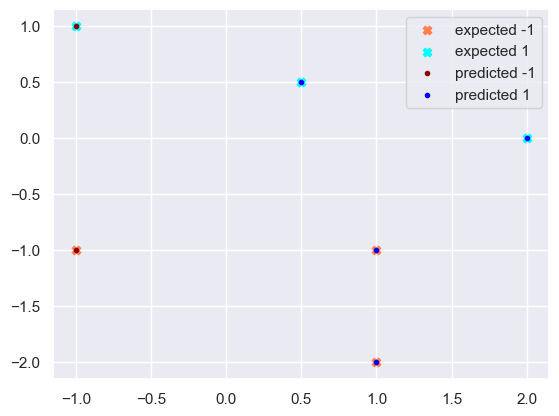

Epoch: 0 Weights: [0.9791666666666666, 0.5375] Hinge Loss: 0.7083333333333334
Epoch: 1 Weights: [0.9583333333333333, 0.575] Hinge Loss: 0.6715277777777778
Epoch: 2 Weights: [0.9374999999999999, 0.6124999999999999] Hinge Loss: 0.6347222222222223
Epoch: 3 Weights: [0.9166666666666665, 0.6499999999999999] Hinge Loss: 0.5979166666666667
Epoch: 4 Weights: [0.8958333333333331, 0.6874999999999999] Hinge Loss: 0.5611111111111111
Epoch: 5 Weights: [0.8749999999999998, 0.7249999999999999] Hinge Loss: 0.5243055555555556
Epoch: 6 Weights: [0.8541666666666664, 0.7624999999999998] Hinge Loss: 0.4875
Epoch: 7 Weights: [0.833333333333333, 0.7999999999999998] Hinge Loss: 0.45069444444444445
Epoch: 8 Weights: [0.8124999999999997, 0.8374999999999998] Hinge Loss: 0.4138888888888889
Epoch: 9 Weights: [0.7916666666666663, 0.8749999999999998] Hinge Loss: 0.3770833333333334
Epoch: 10 Weights: [0.7708333333333329, 0.9124999999999998] Hinge Loss: 0.34027777777777785
Epoch: 11 Weights: [0.758333333333333, 0.9333

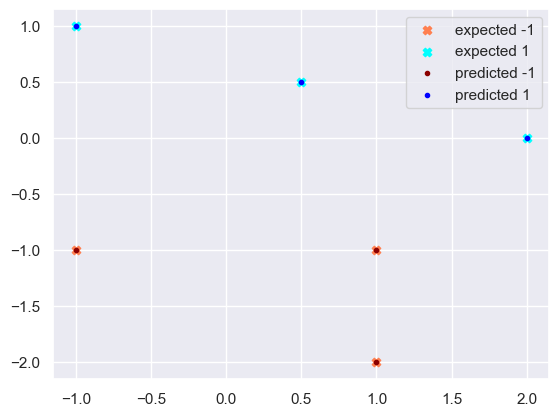

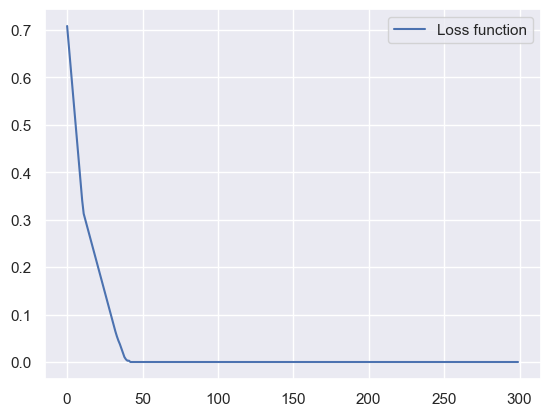

In [3]:
n_epochs = 300
eta = 0.05


classifier.plot_data(data, labels)
classifier.fit(n_epochs, data, labels, learningRate=eta)
classifier.plot_data(data, labels)
classifier.plot_loss()

### Task 7: Use a larger dataset.
Now, let's try the `BinaryClassifier` on the larger dataset:

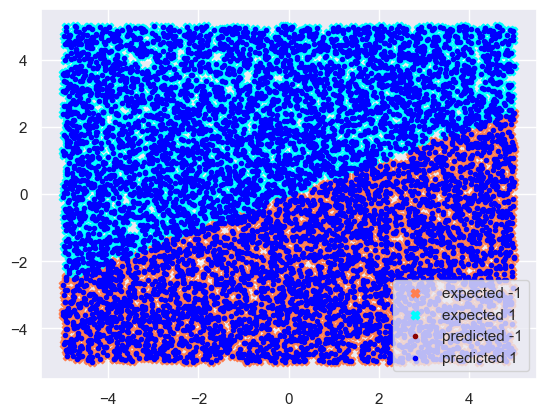

Epoch: 0 Weights: [-0.03911356275496953, 0.11477399441098775] Hinge Loss: 1.0
Epoch: 1 Weights: [-0.07822712550993906, 0.2295479888219755] Hinge Loss: 0.7059411883111968
Epoch: 2 Weights: [-0.09618259666272436, 0.3104287257514923] Hinge Loss: 0.4404626921586242
Epoch: 3 Weights: [-0.11122551338024383, 0.35646250047460276] Hinge Loss: 0.3336335435980279
Epoch: 4 Weights: [-0.1262419029942281, 0.3898468152608011] Hinge Loss: 0.29309076061494516
Epoch: 5 Weights: [-0.1408196657191754, 0.41674900495944645] Hinge Loss: 0.26868885029290845
Epoch: 6 Weights: [-0.15440739204101703, 0.4399180887649968] Hinge Loss: 0.2511177659937902
Epoch: 7 Weights: [-0.16720666920238225, 0.4603959814430268] Hinge Loss: 0.23742703169299484
Epoch: 8 Weights: [-0.17892726764543457, 0.4791229812956451] Hinge Loss: 0.22624304593297878
Epoch: 9 Weights: [-0.18953016137397583, 0.4960564825387227] Hinge Loss: 0.21691747193320732
Epoch: 10 Weights: [-0.19942686052795922, 0.5120654253071374] Hinge Loss: 0.2091587434682

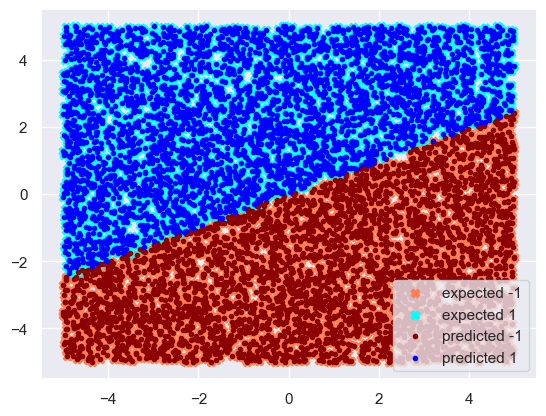

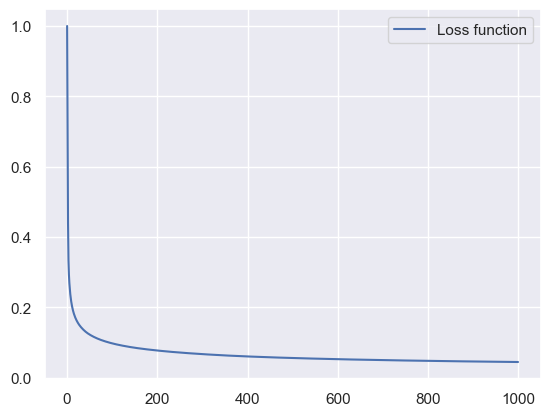

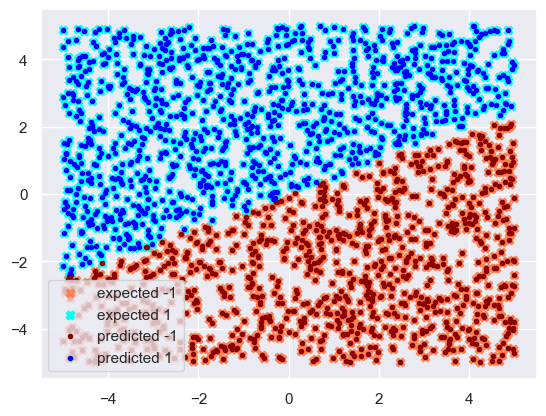

In [4]:
from sklearn.model_selection import train_test_split

n_samples = 10000
data = np.random.uniform(-5, 5, (n_samples, 2))  # 10,000 points in the range [-5, 5] for both x and y

labels = []
for point in data:
    x, y = point
    if y > 0.5 * x:  # Above the line
        labels.append(1)
    else:                # Below the line
        labels.append(-1)

# Split the dataset into training and test sets (80% training, 20% testing)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

n_epochs = 1000
eta = 0.05

large_classifier = BinaryClassifier(0, 0)

# train data
large_classifier.plot_data(train_data, train_labels)
large_classifier.fit(n_epochs, train_data, train_labels, learningRate=eta)
large_classifier.plot_data(train_data, train_labels)
large_classifier.plot_loss()

# test data
large_classifier.plot_data(test_data, test_labels)
